<a href="https://colab.research.google.com/github/ihenry207/Anomaly-Detection-Using-TensforFlow/blob/main/HeartBeatAnomalyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model
import numpy as np

from sklearn.model_selection import train_test_split #used for spliting the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#mpl.rc_params['figure.figsize'] = (10, 8)
#mpl.rcParams['axes.grid'] = False

In [8]:
# Define the file names
test_file = '/content/drive/MyDrive/ECG5000/ECG5000_TEST.txt'
train_file = '/content/drive/MyDrive/ECG5000/ECG5000_TRAIN.txt'
output_file = '/content/drive/MyDrive/ECG5000/ECG5000.txt'


In [9]:
# Open the two input files in read mode and the output file in write mode
with open(test_file, 'r') as test_f, open(train_file, 'r') as train_f, open(output_file, 'w') as output_f:
    # Read the contents of the first file (test.txt) and write them to the output file
    output_f.write(test_f.read())

    # Add a newline character to separate the contents of the two files
    output_f.write('\n')

    # Read the contents of the second file (train.txt) and write them to the output file
    output_f.write(train_f.read())

# Inform the user that the files have been concatenated
#print(f"Concatenated {test_file} and {train_file} into {output_file}.")

In [10]:
df = pd.read_csv('/content/drive/MyDrive/ECG5000/ECG5000.txt', sep = '  ', header = None)
df.head

<ipython-input-10-d9e1a48906ba>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('/content/drive/MyDrive/ECG5000/ECG5000.txt', sep = '  ', header = None)


<bound method NDFrame.head of       0         1         2         3         4         5         6    \
0     1.0  3.690844  0.711414 -2.114091 -4.141007 -4.574472 -3.431909   
1     1.0 -1.348132 -3.996038 -4.226750 -4.251187 -3.477953 -2.228422   
2     1.0  1.024295 -0.590314 -1.916949 -2.806989 -3.527905 -3.638675   
3     1.0  0.545657 -1.014383 -2.316698 -3.634040 -4.196857 -3.758093   
4     1.0  0.661133 -1.552471 -3.124641 -4.313351 -4.017042 -3.005993   
...   ...       ...       ...       ...       ...       ...       ...   
4995  4.0 -0.478577 -1.779959 -2.398159 -3.170112 -3.559732 -3.573956   
4996  4.0 -1.325210 -2.480992 -2.965356 -3.342392 -3.176351 -2.891528   
4997  4.0 -0.021964 -0.912434 -1.903353 -2.662829 -3.122156 -3.451490   
4998  5.0  0.288011 -1.098020 -2.500250 -3.598599 -3.650608 -3.281587   
4999  5.0 -1.133674 -2.702941 -3.120979 -3.558669 -3.312442 -2.607641   

           7         8         9    ...       131       132       133  \
0    -1.950791 -1.10

In [3]:
#!wget https://www.timeseriesclassification.com/Downloads/ECG5000.zip
#!unzip ECG5000.zip

--2023-08-27 15:42:53--  https://www.timeseriesclassification.com/Downloads/ECG5000.zip
Resolving www.timeseriesclassification.com (www.timeseriesclassification.com)... 109.123.71.232
Connecting to www.timeseriesclassification.com (www.timeseriesclassification.com)|109.123.71.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘ECG5000.zip’

ECG5000.zip             [ <=>                ]  20.85K  --.-KB/s    in 0.1s    

2023-08-27 15:42:54 (217 KB/s) - ‘ECG5000.zip’ saved [21350]

Archive:  ECG5000.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of ECG5000.zip or
        ECG5000.zip.zip, and cannot find ECG5000.zip.ZIP, period.


In [4]:
#!ls -arlt

total 44
drwxr-xr-x 4 root root  4096 Aug 24 21:24 .config
drwxr-xr-x 1 root root  4096 Aug 24 21:25 sample_data
drwxr-xr-x 1 root root  4096 Aug 27 15:42 ..
drwx------ 5 root root  4096 Aug 27 15:42 drive
drwxr-xr-x 1 root root  4096 Aug 27 15:42 .
-rw-r--r-- 1 root root 21350 Aug 27 15:42 ECG5000.zip


In [5]:
#concantenating both the train and test into a single dataset
#!cat ECG5000_TRAIN.txt ECG5000_TEST.txt > ecg_final.txt


cat: ECG5000_TRAIN.txt: No such file or directory
cat: ECG5000_TEST.txt: No such file or directory


In [6]:
#printinf the top few records of the file
#!head ecg_final.txt

In [11]:
#printing the column names
df.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            131, 132, 133, 134, 135, 136, 137, 138, 139, 140],
           dtype='int64', length=141)

In [12]:
df = df.add_prefix('c')

In [13]:
df.columns

Index(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9',
       ...
       'c131', 'c132', 'c133', 'c134', 'c135', 'c136', 'c137', 'c138', 'c139',
       'c140'],
      dtype='object', length=141)

In [14]:
df['c0'].value_counts()

1.0    2919
2.0    1767
4.0     194
3.0      96
5.0      24
Name: c0, dtype: int64

In [15]:
df.describe()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c131,c132,c133,c134,c135,c136,c137,c138,c139,c140
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.527400,-0.262476,-1.649511,-2.492211,-3.119443,-3.167438,-2.866308,-2.273126,-1.798127,-1.410124,...,0.146319,0.070973,-0.062914,-0.276206,-0.507667,-0.761043,-0.834741,-0.642263,-0.487242,-0.706008
std,0.760372,1.152369,1.445493,1.386409,1.302802,1.104382,0.906133,0.731627,0.623100,0.637149,...,1.171299,1.404842,1.646585,1.895134,2.059758,2.086218,2.056220,1.859296,1.830987,1.414465
min,1.000000,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,...,-3.971715,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227
25%,1.000000,-1.004511,-2.701576,-3.668096,-4.227247,-4.007470,-3.480479,-2.779941,-2.165851,-1.774124,...,-0.655753,-1.089300,-1.588885,-2.147449,-2.731550,-3.030509,-2.868331,-2.153513,-1.657771,-1.596692
50%,1.000000,-0.297541,-1.661892,-2.585677,-3.387934,-3.468718,-2.947061,-2.285578,-1.750157,-1.422570,...,0.473642,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.565588
75%,2.000000,0.500061,-0.677290,-1.513964,-2.235369,-2.530967,-2.398813,-1.823494,-1.484923,-1.063708,...,1.062134,1.169420,1.238687,1.264471,1.234433,1.034584,0.945237,0.951681,1.002692,0.272012
max,5.000000,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,...,2.960969,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103


In [16]:
train_data, test_data, train_labels, test_labels = train_test_split(df.values, df.values[:, 0:1], test_size = 0.2, random_state = 111)

In [17]:
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

(4000, 141)
(1000, 141)
(4000, 1)
(1000, 1)


In [18]:
scaler = MinMaxScaler()
data_scaled = scaler.fit(train_data)

In [19]:
train_data_scaled = data_scaled.transform(train_data)
test_data_scaled = data_scaled.transform(test_data)

In [20]:
train_data_scaled

array([[0.        , 0.68350165, 0.84555441, ..., 0.50027762, 0.49587899,
        0.39114839],
       [0.        , 0.44621304, 0.31053752, ..., 0.77834844, 0.78233943,
        0.46629036],
       [0.        , 0.71203288, 0.64553551, ..., 0.83309413, 0.67825035,
        0.51983982],
       ...,
       [0.25      , 0.36459305, 0.40436209, ..., 0.2880798 , 0.36659954,
        0.39484257],
       [0.        , 0.44695501, 0.3526011 , ..., 0.7355411 , 0.60488833,
        0.30667936],
       [0.25      , 0.51092627, 0.53072929, ..., 0.27098994, 0.35724797,
        0.39934207]])

In [21]:
#get the normal train data and anomally trained data
#get all the datapoints except for the first column cause it has 0 or non zero for anomally
normal_train_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 == 0').values[:, 1:]
anomally_train_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 > 0').values[:, 1:]

In [22]:
#do the same thing for test_data
normal_test_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 == 0').values[:, 1:] #taking all columns after the 1st column
anomally_test_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 > 0').values[:, 1:]
#after this I could drop the first column but. not necessary

In [23]:
print(normal_train_data.shape)
print(normal_test_data.shape)

(2361, 140)
(2361, 140)


In [24]:
print(anomally_train_data.shape)
print(anomally_test_data.shape)
#we are not going to train with anomally data. it's only for validation and inference/conclusion
#we only train with normal data

(1639, 140)
(1639, 140)


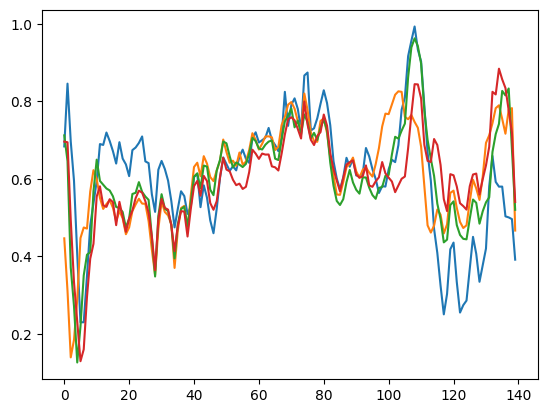

In [25]:
plt.plot(normal_train_data[0])
plt.plot(normal_train_data[1])
plt.plot(normal_train_data[2])
plt.plot(normal_train_data[2355])

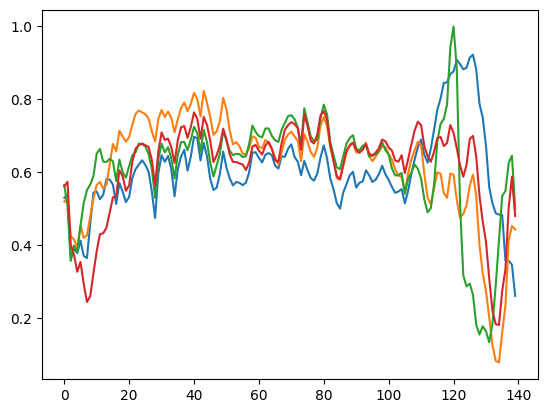

In [27]:
plt.plot(anomally_train_data[0])
plt.plot(anomally_train_data[1])
plt.plot(anomally_train_data[2])
plt.plot(anomally_train_data[163])

In [28]:
#first way: sequential implementation of autoencoder model
#not implemented fully in this code
model = tf.keras.Sequential()
#encoder
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(16, activation = 'relu'))

model.add(tf.keras.layers.Dense(8, activation = 'relu'))#intermediate layer/bottleneck layer
#decoder
model.add(tf.keras.layers.Dense(16, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))

model.add(tf.keras.layers.Dense(140, activation = 'sigmoid'))

In [29]:
#2nd way: subclassing
#helps us to use the encoder and decoder separately easily
#8 layers
class AutoEncoder(Model):
  def __init__(self):
    super(AutoEncoder,self).__init__()
    self.encoder = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(32, activation = 'relu'),
        tf.keras.layers.Dense(16, activation = 'relu'),
        tf.keras.layers.Dense(8, activation = 'relu')])

    self.decoder = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation = 'relu'),
        tf.keras.layers.Dense(32, activation = 'relu'),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(140, activation = 'sigmoid')])

  def call(self, x):
      encoded = self.encoder(x)
      decoded = self.decoder(encoded)
      return decoded




In [30]:
#didn't really use early stopping. might be necessary if data is way too huge
model = AutoEncoder()
#I want to stop incase the validation loss does not improve across 2 epochs
#if it's accuracy mode = 'max or you can leave it and it populate auto
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 2, mode = 'min') #this part not really needed

model.compile(optimizer='adam', loss='mae') #mean absolute error

In [31]:
history = model.fit(normal_train_data,
                    normal_train_data,  #train the model with normal data how it looks
                    epochs = 50,  # early stopping so it won't run for all 50 epochs
                    batch_size = 128,
                    validation_data = (train_data_scaled[:,1:], train_data_scaled[:,1:]), #passing entire dataset excpet for column 1.it contain both the normal and anomally data
                    shuffle = True,
                    #callbacks = [early_stopping])
)


Epoch 1/50
19/19 [==============================] - 2s 15ms/step - loss: 0.1217 - val_loss: 0.1028
Epoch 2/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0692 - val_loss: 0.0760
Epoch 3/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0489 - val_loss: 0.0744
Epoch 4/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0462 - val_loss: 0.0728
Epoch 5/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0459 - val_loss: 0.0722
Epoch 6/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0455 - val_loss: 0.0721
Epoch 7/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0453 - val_loss: 0.0718
Epoch 8/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0450 - val_loss: 0.0715
Epoch 9/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0444 - val_loss: 0.0701
Epoch 10/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0426 - val_loss: 0.0674
Epoch 11/50
19/19 

In [32]:
encoder_out = model.encoder(normal_test_data).numpy()
decoder_out = model.decoder(encoder_out)

In [33]:
normal_test_data.shape

(2361, 140)

In [34]:
encoder_out.shape

(2361, 8)

In [35]:
decoder_out.shape

TensorShape([2361, 140])

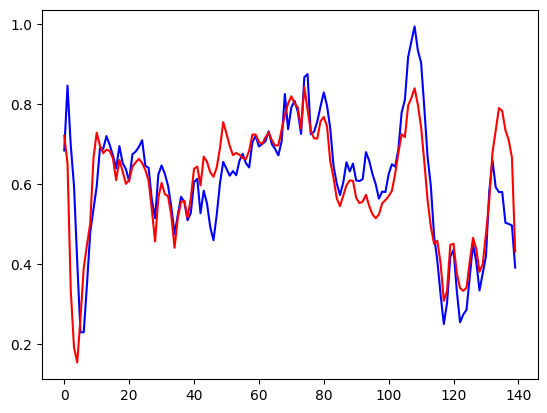

In [36]:
plt.plot(normal_test_data[0], 'b')
plt.plot(decoder_out[0], 'r')
#the small difference between the two graphs is called the reconstruction error
#this is for normal data

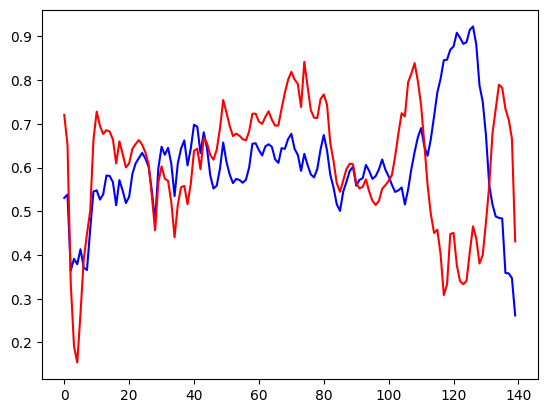

In [37]:
#let's see what happens when u plot the decoded data with anomally data
plt.plot(anomally_test_data[0], 'b')
plt.plot(decoder_out[0], 'r')
#you can see there is a huge reconstruction error than from normal data

In [38]:
decoder_out

<tf.Tensor: shape=(2361, 140), dtype=float32, numpy=
array([[0.7203497 , 0.6513926 , 0.3344366 , ..., 0.70976895, 0.66604406,
        0.4310328 ],
       [0.539124  , 0.44139007, 0.19334571, ..., 0.7329419 , 0.71820855,
        0.43234473],
       [0.6847769 , 0.62990224, 0.35042644, ..., 0.78336275, 0.7314844 ,
        0.5093176 ],
       ...,
       [0.669466  , 0.56827927, 0.23618963, ..., 0.67863125, 0.6644026 ,
        0.3747012 ],
       [0.43410036, 0.37744698, 0.17837699, ..., 0.6471085 , 0.6115588 ,
        0.3833196 ],
       [0.48433056, 0.40176976, 0.1762753 , ..., 0.6552578 , 0.6286493 ,
        0.37738073]], dtype=float32)>

74/74 [==============================] - 0s 1ms/step


(array([ 50., 206., 339., 402., 349., 252., 202., 159., 101.,  81.,  48.,
         40.,  21.,  32.,  16.,  10.,   6.,   5.,   9.,   3.,   4.,   3.,
          1.,   2.,   0.,   0.,   3.,   3.,   2.,   0.,   0.,   1.,   2.,
          1.,   1.,   1.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,
          0.,   1.,   0.,   1.,   0.,   1.]),
 array([0.00959606, 0.01244776, 0.01529946, 0.01815116, 0.02100286,
        0.02385456, 0.02670626, 0.02955796, 0.03240966, 0.03526136,
        0.03811306, 0.04096476, 0.04381646, 0.04666816, 0.04951986,
        0.05237156, 0.05522326, 0.05807496, 0.06092666, 0.06377836,
        0.06663006, 0.06948176, 0.07233346, 0.07518516, 0.07803686,
        0.08088856, 0.08374026, 0.08659196, 0.08944366, 0.09229536,
        0.09514706, 0.09799876, 0.10085046, 0.10370216, 0.10655386,
        0.10940556, 0.11225726, 0.11510896, 0.11796066, 0.12081236,
        0.12366406, 0.12651576, 0.12936746, 0.13221916, 0.13507086,
        0.13792256, 0.14077426, 0.14362596, 0.

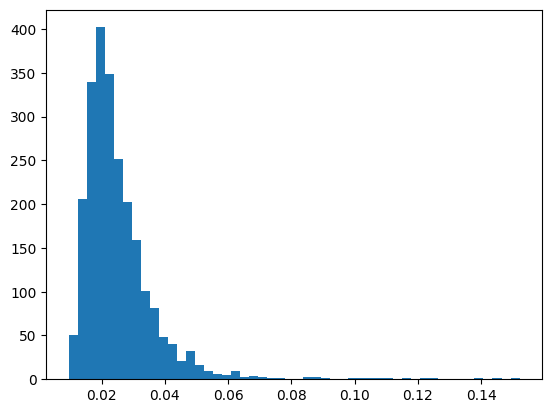

In [39]:
reconstruction = model.predict(normal_test_data)
train_loss = tf.keras.losses.mae(reconstruction, normal_test_data)

plt.hist(train_loss, bins=50)


In [40]:
train_loss.shape

TensorShape([2361])

In [41]:
np.mean(train_loss)

0.025318233172224116

In [45]:
np.std(train_loss)

0.012295050141873149

In [43]:
#threshold = np.mean(train_loss) + 2*np.std(train_loss)

In [49]:
threshold = np.percentile(train_loss, 96.7)
threshold
#so anything below threshold, the data is going to be normal and anything above, the data will be not normal

0.04962768450907391

52/52 [==============================] - 0s 815us/step


(array([  2.,   0.,   1.,   2.,   3.,   8.,  14.,  13.,  10.,  11.,   8.,
         10.,  13.,  27.,  64.,  75., 126., 157., 190., 207., 185., 139.,
        140.,  94.,  54.,  33.,  12.,   5.,   5.,   3.,   9.,   1.,   0.,
          1.,   2.,   3.,   0.,   3.,   3.,   1.,   0.,   1.,   0.,   1.,
          0.,   0.,   1.,   0.,   0.,   2.]),
 array([0.01663232, 0.02001971, 0.0234071 , 0.0267945 , 0.03018189,
        0.03356928, 0.03695667, 0.04034406, 0.04373145, 0.04711884,
        0.05050623, 0.05389362, 0.05728101, 0.0606684 , 0.06405579,
        0.06744319, 0.07083058, 0.07421797, 0.07760536, 0.08099275,
        0.08438014, 0.08776753, 0.09115492, 0.09454231, 0.0979297 ,
        0.10131709, 0.10470448, 0.10809188, 0.11147927, 0.11486666,
        0.11825405, 0.12164144, 0.12502883, 0.12841622, 0.13180361,
        0.135191  , 0.13857839, 0.14196578, 0.14535317, 0.14874056,
        0.15212796, 0.15551535, 0.15890274, 0.16229013, 0.16567752,
        0.16906491, 0.1724523 , 0.17583969, 0.

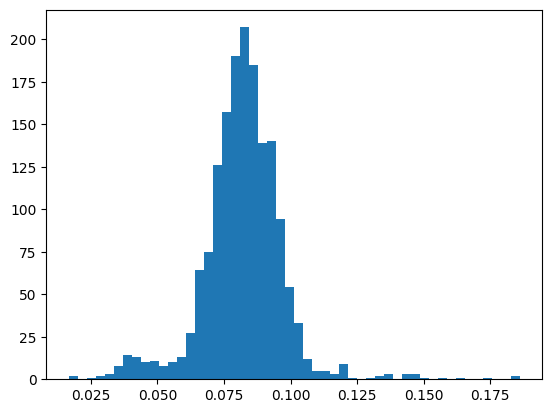

In [50]:
reconstruction_a = model.predict(anomally_test_data)
train_loss_a = tf.keras.losses.mae(reconstruction_a, anomally_test_data)

plt.hist(train_loss_a, bins=50)

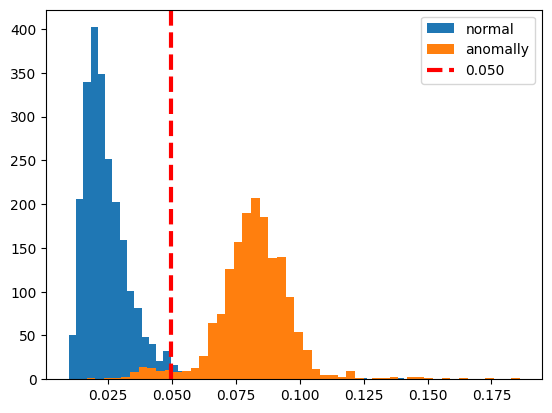

In [51]:
plt.hist(train_loss, bins = 50, label='normal')
plt.hist(train_loss_a, bins = 50, label='anomally')
plt.axvline(threshold, color = 'r', linewidth = 3, linestyle = 'dashed', label= '{:0.3f}'.format(threshold))
plt.legend(loc = 'upper right')
plt.show()

In [52]:
np.mean(train_loss_a)


0.08201624116985817

In [53]:
np.std(train_loss_a)

0.015469099858573587

In [54]:
threshold_a = np.mean(train_loss) + 2*np.std(train_loss)
threshold_a

0.04990833345597041

In [55]:
#now let's see how well the model performed
tf.math.less(train_loss, threshold)

<tf.Tensor: shape=(2361,), dtype=bool, numpy=array([False,  True,  True, ...,  True,  True,  True])>

In [56]:
preds = tf.math.less(train_loss, threshold)

In [57]:
tf.math.count_nonzero(preds)
#2272 were predicted correctly of the 2356
#so about 96% accuracy

<tf.Tensor: shape=(), dtype=int64, numpy=2283>

In [58]:
preds.shape

TensorShape([2361])

In [59]:
preds_a = tf.math.greater(train_loss_a, threshold_a)

In [60]:
tf.math.count_nonzero(preds_a)
#so about 1619 were predicted correctly of the 1644
# the accuracy is about 98% to get the anomally

<tf.Tensor: shape=(), dtype=int64, numpy=1578>

In [61]:
preds_a.shape

TensorShape([1639])